A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of a drug, subjecting each to neurologist stimulus and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats's response time is 1.05 seconds with population standard deviation of 0.5 seconds. Do you think the drug has effect on response time?

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2009/10/xXbar-mu1.bmp">

Recall: $\mu = 1.2$, $\bar{x} = 1.05$, $N = 100$ and $\sigma = 0.5$



In [4]:
# Calculate Z_Score

import math
z_score = (1.05 - 1.2)/(.5/math.sqrt(100))
z_score

-2.9999999999999982

In [9]:
# Calculate P_Value
from scipy.stats import norm
import numpy as np

2 * norm.cdf(-np.abs(z_score))

0.0026997960632602026

In [11]:
# Note: SF stands for survival function
p_value = scipy.stats.norm.sf(abs(z_score))*2
p_value

0.0026997960632602026

In [12]:
if p_value < .05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')


reject null hypothesis


In [14]:
def accept_or_reject_null_hypothesis(mu, sample_mean, significant_level, N):
    # Calculate standard deviation of the sampling distribution
    sample_std = sigma / math.sqrt(N)
    
    # Calculate z-score from population mean (mu), sample mean and sample std
    z = (sample_mean - mu) / sample_std
    
    # Calculate p-value from z-score
    p_value = 2 * norm.cdf(-np.abs(z))
    
    # Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')

In [20]:
from scipy import stats
import numpy as np

heights = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
population_mean = 175.3
sample_mean = np.array(heights).mean()

# Calculate the standard deviation of sample distribution

heights_num = len(heights) # number of data samples

# get the sample standard deviation
sample_std_deviation = np.array(heights).std(ddof=1)

# correct for possible sample errors
sample_error = sample_std_deviation / np.sqrt(heights_num)

# t-test from formula
t_score = (sample_mean - population_mean)/sample_error
print("t-statistic: ",t)

# one sample t-test that gives you the p-value too can be done with scipy as follows:
t_score, p_value = stats.ttest_1samp(heights, population_mean)
print("t score = ", t_score, ", p value = ", p_value)

t-statistic:  2.295568968083183
t score =  2.295568968083183 , p value =  0.04734137339747034


In [16]:
def z_t_determiner(mu, sample_mean, sigma, significant_level, N):
    if sigma:
        z = (sample_mean - mu) / sample_std
        p_value = 2 * norm.cdf(-np.abs(z))
    if len(N) > 30:
        z = (sample_mean - mu) / sample_std
        p_value = 2 * norm.cdf(-np.abs(z))
    elif len(N) < 30:
        t, p = stats.ttest_1samp(N, mu)
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')        

In [18]:
x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

z_t_determiner(mu, np.array(x).mean(), sigma = False, .05, len(x))

SyntaxError: positional argument follows keyword argument (<ipython-input-18-eb5c6a5a6b9a>, line 3)

In [19]:
def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    if sigma:
        z_score = (np.mean(data_sample)-mu)/(sigma/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    elif len(data_sample) > 30:
        z_score = (np.mean(data_sample)-mu)/(np.std(data_sample)/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    else:
        t, p = stats.ttest_1samp(data_sample, mu)
    
    if p < significant_level:
        print('reject null hypothesis')
        
    else:
        print('accept null hypothesis')

In [47]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
scipy.stats.norm.ppf()

TypeError: ppf() missing 1 required positional argument: 'q'

In [56]:
iris[(iris['species'] == "setosa")].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [62]:
import pandas as pd
import numpy as np
import scipy.stats

df = sns.load_dataset('iris')

x = df[df['species'] == 'setosa']['sepal_length'].tolist()

print(np.mean(x))

def ci_z(data_sample, significant_level, sigma):
    z = scipy.stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z*sigma/np.sqrt(len(data_sample))
    return L, U


def ci_t(data_sample, significant_level):
    t = scipy.stats.t.ppf(1 - significant_level/2, len(data_sample) - 1)
    L = np.mean(data_sample) - t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    return L, U

print(ci_z(x, 0.05, 0.3525))
print(ci_t(x,0.05))

5.006
(4.908293780383348, 5.103706219616653)
(4.905823539430869, 5.106176460569132)


In [5]:
import numpy as np
# write a function that finds outliers
def outlier_list_finder(datasample):
    mean = np.mean(datasample)
    std_dev = np.std(datasample)
    min_outliers = mean - 3 * std_dev
    max_outliers = mean + 3 * std_dev
    outlier_list = []
    
    for value in datasample:
        if value < min_outliers or value > max_outliers:
            outlier_list.append(value)
    return outlier_list
    

test = [1, 2, 3, 3, 3, 4, 5, 5, 4, 500, 6, 7, 8, 9, 10, 11]
outlier_list_finder(test)

[500]

In [10]:
from scipy.stats import norm

x = [norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]
x

[array([5.6034503 , 4.8939997 , 3.07907606, 5.4036061 , 6.28427541,
        4.0119473 , 4.78471116, 4.05029748, 4.47203877, 5.13610173,
        5.11859364, 6.25482744, 4.98264895, 4.4388951 , 4.07865065,
        5.61500995, 5.59905838, 3.61002274, 5.40973249, 5.5462644 ,
        5.0412294 , 6.02899692, 5.6967214 , 6.03783891, 5.31738164,
        4.78736216, 5.38808529, 3.61223094, 6.89563132, 3.71700726,
        5.25788552, 5.93210666, 4.39477283, 4.17648436, 6.51784617,
        5.23261859, 4.81669921, 6.52385596, 5.70866281, 5.99888386,
        5.05848147, 4.66805004, 4.74874844, 4.18254742, 5.24869447,
        5.22421547, 4.75087057, 5.92038125, 2.90927521, 5.10874915,
        6.30978608, 4.14572498, 5.15615896, 6.53474146, 5.23611918,
        5.6743529 , 3.26315434, 5.82580255, 5.78200297, 6.69593288,
        4.58283351, 5.1560109 , 4.47932531, 5.86382056, 5.38854085,
        4.78019875, 3.92582507, 4.90309946, 5.21244142, 5.56474574,
        6.0850012 , 5.8642571 , 2.34650079, 3.68

In [20]:
def find_remove_outliers_iqr(data_sample):
    q25 = np.percentile(data_sample, 25)
    q75 = np.percentile(data_sample, 75)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    outlier_list = []
    
    for value in data_sample:
        if value < lower_bound or value > upper_bound:
            outlier_list.append(value)
    return outlier_list

test = [1, 2, 3, 3, 3, 4, 5, 5, 4, 6, 7, 8, 9, 10, 11, 50, -502]
find_remove_outliers_iqr(test)

[50, -502]

In [26]:
y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outliers_iqr(x))
print(scipy.stats.iqr(x))

<class 'numpy.ndarray'>
[-5.0, 11.0, 14.0]
1.6599628173362024


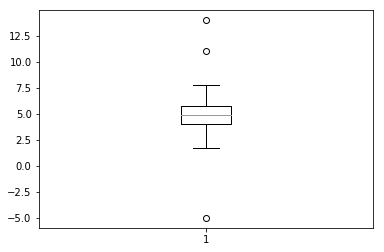

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.show()

# Gaussian Mixture Model (GMM)
### Goal: to approximate the histogram of any data samples by 2 or 3 normal distributions
<img src="https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/raw/master/Notebooks/Images/gmm_fig.png">
Can be used to generate data if, for example, have blanks in data

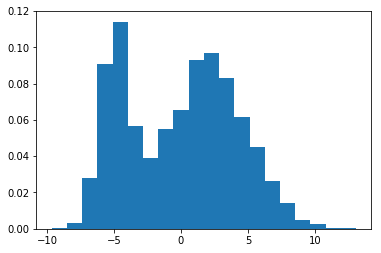

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [34]:
# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print("gmm:", gmm)
print("gmm.means_:", gmm.means_)
print("gmm.covariances_:", gmm.covariances_)
print("gmm.weights_:", gmm.weights_)


gmm: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
gmm.means_: [[-4.89032752]
 [ 2.17996695]]
gmm.covariances_: [[[1.2138115 ]]

 [[8.14880344]]]
gmm.weights_: [0.32099003 0.67900997]


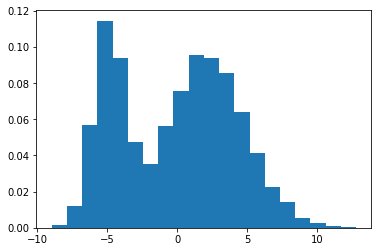

In [35]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

# Kernel Density Estimation(KDE)

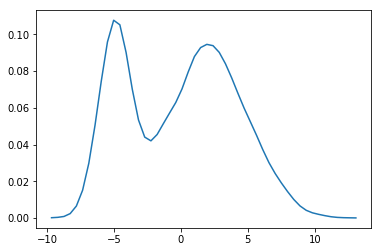

In [37]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

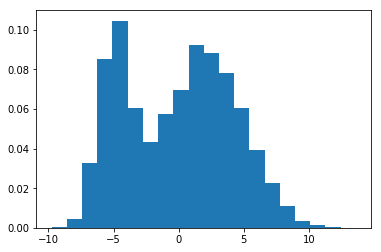

In [38]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

# Correlation

In [39]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
iris.drop(columns = ['species'])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [44]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


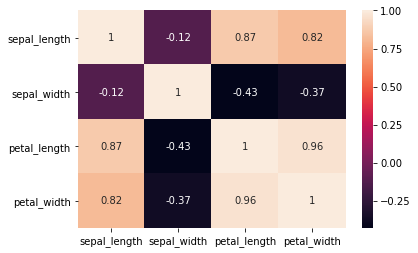

In [47]:
import seaborn as sns

sns.heatmap(iris.corr(), annot = True)

In [53]:
scipy.stats.pearsonr(iris['sepal_length'], iris['petal_length'])

(0.8717537758865832, 1.0386674194497583e-47)

In [64]:
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(iris['sepal_length'], iris['petal_length']))
print(scipy.stats.pearsonr(iris['sepal_length'], iris['petal_length']))

0.8717537758865832
(0.8717537758865832, 1.0386674194497583e-47)


In [59]:
def _value_to_category(value):
    """ Helper function to convert numerical values between -1.0 and 1.0 to discretized categories. """
    _categorical_types, _value_ranges_test = ["- (S)", "- (M)", "- (W)", "0", "+ (W)", "+ (M)", "+ (S)"], [-1.0, -0.7, -0.4, -0.1, 0.1, 0.4, 0.7, 1.0]
    # Iterates through value ranges and checks if value falls within specific range
    for index in range(len(_value_ranges_test) - 1):
        if float(value) >= _value_ranges_test[index] and float(value) < _value_ranges_test[index + 1]:
            return _categorical_types[index]

def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

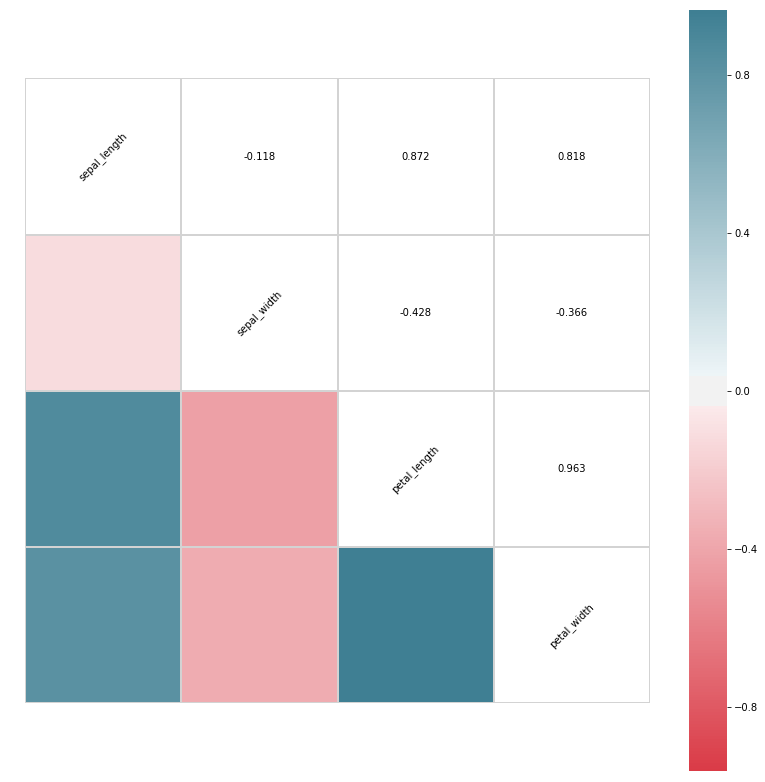

In [61]:
corrplot_(iris)